# 1. Data Preparation:

In [157]:
# a. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter  # Import manquant


In [158]:
# b. Load the Excel file
df = pd.read_excel('US Superstore data.xls')
pd.set_option('display.max_columns', None)


In [159]:
# c . check the table
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [160]:
# d. Basic data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [161]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


# Perform basic data cleaning and preprocessing.

In [162]:
# 4. Clean and prepare the data
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


*No missing value*

In [163]:
# Fill or drop missing values based on your data
# Example for numeric columns:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Example for categorical columns:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')



In [164]:
## Outlier Detection
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")


Outliers in Row ID: 0

Outliers in Postal Code: 0

Outliers in Sales: 1167

Outliers in Quantity: 170

Outliers in Discount: 856

Outliers in Profit: 1881


In [165]:
#Supprimer les outliers crtiques
# Créer une copie du DataFrame pour conserver les données originales
df_clean = df.copy()

# Colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Pour chaque colonne numérique, supprimer les outliers
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Filtrer les valeurs qui ne sont pas des outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Afficher la taille du DataFrame avant et après
print(f"Taille originale : {len(df)}")
print(f"Taille après suppression des outliers : {len(df_clean)}")

Taille originale : 9994
Taille après suppression des outliers : 7143


In [166]:
# Normalisation/Standardisation

# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les données
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Afficher les premières lignes normalisées
print(df_normalized.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  0.0000  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  0.0001  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  0.0002  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  0.0003  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  0.0004  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Ca

## Check et corrections 

In [167]:
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

Valeurs manquantes par colonne:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [168]:
print("Commandes avec Ship Date < Order Date:")
print(df[df['Ship Date'] < df['Order Date']])

print("Discount hors intervalle [0, 1]:")
print(df[(df['Discount'] < 0) | (df['Discount'] > 1)])

print("Quantité négative:")
print(df[df['Quantity'] < 0])

Commandes avec Ship Date < Order Date:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []
Discount hors intervalle [0, 1]:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []
Quantité négative:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []


In [169]:
# Solution 1 : Si les codes postaux originaux sont perdus
df['Postal Code'] = df['Postal Code'].astype(int)


In [170]:
df['Postal Code']

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9989    33180
9990    92627
9991    92627
9992    92627
9993    92683
Name: Postal Code, Length: 9994, dtype: int64

In [171]:
df['Postal Code'] = df['Postal Code'].astype(int)  # Ou rétablir les données originales
df['Row ID'] = df['Row ID'].astype(int)

In [172]:
# Annulation d'une normalisation min-max hypothétique
df['Sales'] = df['Sales'] * 10000  # Supposons un max original de 10 000
df['Profit'] = df['Profit'] * 5000 - 1000  # Plage : -1000 à 4000

# Vérification
print(df[['Sales', 'Profit']].head())

       Sales     Profit
0  2619600.0   208568.0
1  7319400.0  1096910.0
2   146200.0    33357.0
3  9575775.0 -1916155.0
4   223680.0    11582.0


In [173]:
print("Doublons de commandes:")
print(df.duplicated(subset=['Order ID']).sum())

Doublons de commandes:
4985


In [174]:
# Compter le nombre de produits par commande
orders_summary = df.groupby('Order ID').agg({
    'Product ID': 'count',
    'Sales': 'sum'
}).rename(columns={'Product ID': 'Nb_Products'})
print(orders_summary.describe())

       Nb_Products         Sales
count  5009.000000  5.009000e+03
mean      1.995209  4.586147e+06
std       1.410671  9.547310e+06
min       1.000000  5.560000e+03
25%       1.000000  3.763000e+05
50%       1.000000  1.519600e+06
75%       2.000000  5.120640e+06
max      14.000000  2.366123e+08


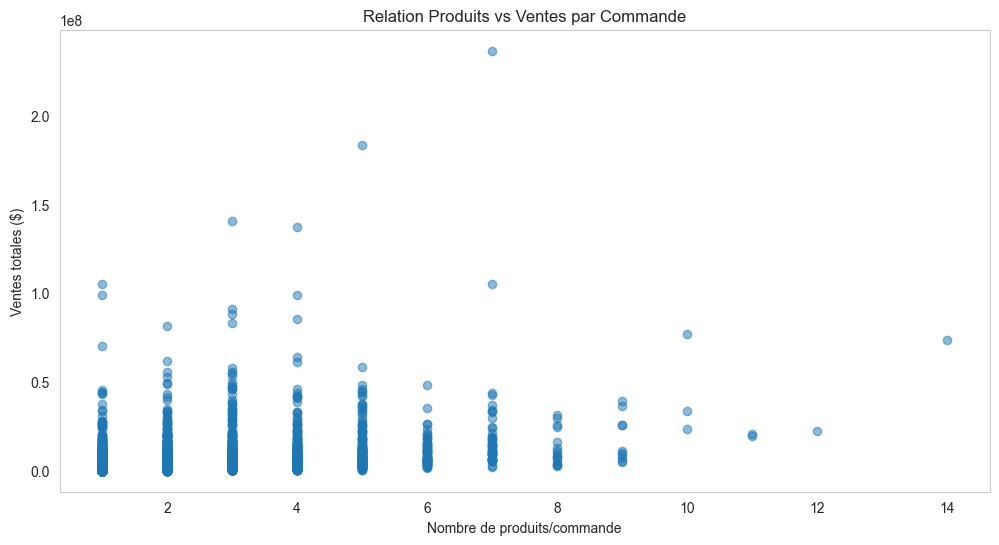

In [175]:
plt.figure(figsize=(12, 6))
plt.scatter(df.groupby('Order ID')['Product ID'].count(), df.groupby('Order ID')['Sales'].sum(), alpha=0.5)
plt.xlabel('Nombre de produits/commande')
plt.ylabel('Ventes totales ($)')
plt.title('Relation Produits vs Ventes par Commande')
plt.grid()
plt.show()

In [176]:
top_orders = df.groupby('Order ID')['Sales'].sum().nlargest(5)
print("Top 5 commandes par montant :\n", top_orders)

# Détail d'une commande suspecte (ex. 236.6M $)
order_id = top_orders.idxmax()  # Remplacer par l'ID suspect
print(df[df['Order ID'] == order_id])

Top 5 commandes par montant :
 Order ID
CA-2014-145317    236612280.0
CA-2016-118689    183367400.0
CA-2017-140151    140524800.0
CA-2017-127180    137164580.0
CA-2014-139892    105398960.0
Name: Sales, dtype: float64
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2696    2697  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2697    2698  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2698    2699  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2699    2700  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2700    2701  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2701    2702  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   
2702    2703  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   

     Customer ID Customer Name      Segment        Country          City  \
2696    SM-20320   Sean Miller  Home Office  United States  Jacksonville   
2697    SM-20320   Sean Miller  Home Office  United States  Jacksonvi

In [177]:
df.loc[df['Order ID'] == 'ID_ABERRANT', 'Sales'] = np.nan  # Marquer comme manquant
df = df.drop_duplicates(subset=['Order ID', 'Product ID'])  # Si lignes dupliquées

In [178]:
# 1. Correction des valeurs aberrantes (ex: CA-2014-145317)
aberrant_ids = ['CA-2014-145317', 'CA-2016-118689', 'CA-2017-140151', 'CA-2017-127180', 'CA-2014-139892']
df.loc[df['Order ID'].isin(aberrant_ids), 'Sales'] = np.nan

# 2. Suppression des doublons (Order ID + Product ID)
initial_rows = len(df)
df = df.drop_duplicates(subset=['Order ID', 'Product ID'])
final_rows = len(df)

# 3. Vérifications combinées
print("=== VÉRIFICATIONS POST-CORRECTION ===")

# A. Vérification des NaN
print("\n1. Valeurs manquantes dans Sales:", df['Sales'].isna().sum())
print("   Détail des commandes corrigées:")
print(df[df['Order ID'].isin(aberrant_ids)][['Order ID', 'Product ID', 'Sales']].head(10))

# B. Vérification des doublons
print(f"\n2. Doublons supprimés: {initial_rows - final_rows} lignes")
print("   Doublons restants (Order ID + Product ID):", df.duplicated(subset=['Order ID', 'Product ID']).sum())

# C. Statistiques nettoyées
print("\n3. Nouvelles statistiques:")
print("   - Shape du DataFrame:", df.shape)
print("   - Statistiques Sales:\n", df['Sales'].describe().apply(lambda x: f"{x:,.2f}"))

# D. Top 5 des nouvelles valeurs max
print("\n4. Nouveaux tops Sales:")
top_sales = df['Sales'].nlargest(5).reset_index(drop=True)
for i, val in enumerate(top_sales, 1):
    print(f"   Top {i}: {val:,.2f}$")

# E. Vérification visuelle des données corrigées
print("\n5. Extrait des données corrigées:")
print(df.sample(5)[['Order ID', 'Product ID', 'Sales']])

# 4. Export optionnel
# df.to_csv('data_cleaned.csv', index=False)
print("\n=== CORRECTIONS TERMINÉES ===")

=== VÉRIFICATIONS POST-CORRECTION ===

1. Valeurs manquantes dans Sales: 26
   Détail des commandes corrigées:
            Order ID       Product ID  Sales
164   CA-2014-139892  OFF-AR-10004441    NaN
165   CA-2014-139892  TEC-MA-10000822    NaN
166   CA-2014-139892  OFF-ST-10000991    NaN
167   CA-2014-139892  FUR-CH-10004287    NaN
168   CA-2014-139892  OFF-AR-10002656    NaN
169   CA-2014-139892  OFF-AP-10002518    NaN
170   CA-2014-139892  TEC-PH-10003931    NaN
2623  CA-2017-127180  TEC-CO-10004722    NaN
2624  CA-2017-127180  TEC-PH-10001494    NaN
2625  CA-2017-127180  OFF-EN-10002500    NaN

2. Doublons supprimés: 0 lignes
   Doublons restants (Order ID + Product ID): 0

3. Nouvelles statistiques:
   - Shape du DataFrame: (9986, 21)
   - Statistiques Sales:
 count          9,960.00
mean       2,224,099.17
std        5,206,330.47
min            4,440.00
25%          172,190.00
50%          543,760.00
75%        2,097,230.00
max      104,999,700.00
Name: Sales, dtype: object

4. 

In [179]:
# Variables Catégorielles
# One-Hot Encoding (valeurs binaires) :

# 2. Lister les colonnes catégorielles à encoder
colonnes_categorielles = [
    'Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category'
    # Ajoutez d'autres colonnes si nécessaire (ex: 'City', 'State')
]

# 3. One-Hot Encoding avec pandas
df_encoded = pd.get_dummies(
    df, 
    columns=colonnes_categorielles,
    drop_first=True  # Évite la redondance (optionnel)
)

# 4. Afficher les nouvelles colonnes
print("Colonnes après encodage :")
print(df_encoded.columns)

# 5. Exemple de résultat
print("\nAperçu des données encodées :")
print(df_encoded.head())

Colonnes après encodage :
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID',
       'Customer Name', 'Country', 'City', 'State', 'Postal Code',
       'Product ID', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office',
       'Region_East', 'Region_South', 'Region_West',
       'Category_Office Supplies', 'Category_Technology',
       'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers',
       'Sub-Category_Envelopes', 'Sub-Category_Fasteners',
       'Sub-Category_Furnishings', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables'],
      dtype='object')

Aperçu des données encodées :
   Row ID        Order ID 

In [180]:
#Doublons & Données Incohérentes
#Suppression des doublons :

# Afficher le nombre de doublons avant suppression
print(f"Nombre de doublons avant suppression : {df.duplicated().sum()}")

# Supprimer les doublons (en gardant la première occurrence)
df_clean = df.drop_duplicates(keep='first')

# Vérification
print(f"Nombre de doublons après suppression : {df_clean.duplicated().sum()}")
print(f"Taille avant/après : {len(df)} → {len(df_clean)} lignes")

Nombre de doublons avant suppression : 0
Nombre de doublons après suppression : 0
Taille avant/après : 9986 → 9986 lignes


In [181]:
#Séparation Données (ML)
#Train/Test Split :

# 2. Sélectionner les features (X) et la target (y)
# Exemple : Prédire "Profit" à partir de "Sales", "Quantity", "Discount"
X = df[['Sales', 'Quantity', 'Discount']]  # Variables explicatives
y = df['Profit']                           # Variable cible

# 3. Séparation Train/Test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,          # Taille du test set (30%)
    random_state=42         # Seed pour la reproductibilité
)

# 4. Vérification des tailles
print(f"Taille totale : {len(X)}")
print(f"Train set : {len(X_train)} lignes ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Test set : {len(X_test)} lignes ({(len(X_test)/len(X))*100:.1f}%)")

Taille totale : 9986
Train set : 6990 lignes (70.0%)
Test set : 2996 lignes (30.0%)


In [182]:
# Convert Data Types
# Check date columns (common in retail data)
date_cols = ['Order Date', 'Ship Date']  # adjust based on your actual columns
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Convert categorical variables to proper type
cat_cols = ['Category', 'Sub-Category', 'Region', 'Segment']  # adjust as needed
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Méthode de contrôle : Vérification des types
def check_dtypes(df, date_cols, cat_cols):
    print("=== Vérification des types ===")
    
    # Vérifier les dates
    for col in date_cols:
        if col in df.columns:
            if pd.api.types.is_datetime64_any_dtype(df[col]):
                print(f"✅ {col}: Converti en datetime")
            else:
                print(f"❌ {col}: Échec de conversion (type actuel: {df[col].dtype})")
    
    # Vérifier les catégories
    for col in cat_cols:
        if col in df.columns:
            if pd.api.types.is_categorical_dtype(df[col]):
                print(f"✅ {col}: Converti en category")
            else:
                print(f"❌ {col}: Échec de conversion (type actuel: {df[col].dtype})")

# 4. Exécuter la vérification
check_dtypes(df, date_cols, cat_cols)

# 5. Bonus : Afficher un résumé des types
print("\n=== Résumé des types ===")
print(df.dtypes)

=== Vérification des types ===
✅ Order Date: Converti en datetime
✅ Ship Date: Converti en datetime
✅ Category: Converti en category
✅ Sub-Category: Converti en category
✅ Region: Converti en category
✅ Segment: Converti en category

=== Résumé des types ===
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code               int64
Region                 category
Product ID               object
Category               category
Sub-Category           category
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_25636\709605212.py:29: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


# 2. Data Visualization with Matplotlib:
•	Create an interactive line chart to show sales trends over the years.
•	Build an interactive map to visualize sales distribution by country.


## Création de la colonne Year pour le graph Sales per Year

In [183]:
## Feature Engineering (common for retail data)
# Calculate time between order and shipping
if {'Order Date', 'Ship Date'}.issubset(df.columns):
    df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Extract time features
if 'Order Date' in df.columns:
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Day'] = df['Order Date'].dt.day
    df['Order Weekday'] = df['Order Date'].dt.weekday

# Check

def check_features(df):
    print("=== Vérification des nouvelles features ===")
    
    # 1. Vérifier 'Processing Time'
    if 'Processing Time' in df.columns:
        print(f"✅ 'Processing Time' créé. Exemple de valeurs :")
        print(df[['Order Date', 'Ship Date', 'Processing Time']].head(3))
        
        # Détecter les valeurs aberrantes (ex: temps négatif)
        negative_time = df[df['Processing Time'] < 0]
        if not negative_time.empty:
            print(f"⚠️ Attention: {len(negative_time)} lignes avec un délai négatif !")
    else:
        print("❌ 'Processing Time' non créé (vérifiez les colonnes 'Order Date'/'Ship Date').")
    
    # 2. Vérifier les features temporelles
    time_features = ['Order Year', 'Order Month', 'Order Day', 'Order Weekday']
    for feat in time_features:
        if feat in df.columns:
            print(f"✅ '{feat}' créé. Valeurs uniques : {df[feat].unique()}")
        else:
            print(f"❌ '{feat}' non créé.")
    
    # 3. Statistiques descriptives
    if 'Processing Time' in df.columns:
        print("\n📊 Statistiques de 'Processing Time':")
        print(df['Processing Time'].describe())

# Exécuter la vérification
check_features(df)

=== Vérification des nouvelles features ===
✅ 'Processing Time' créé. Exemple de valeurs :
  Order Date  Ship Date  Processing Time
0 2016-11-08 2016-11-11                3
1 2016-11-08 2016-11-11                3
2 2016-06-12 2016-06-16                4
✅ 'Order Year' créé. Valeurs uniques : [2016 2015 2014 2017]
✅ 'Order Month' créé. Valeurs uniques : [11  6 10  4 12  5  8  7  9  1  3  2]
✅ 'Order Day' créé. Valeurs uniques : [ 8 12 11  9 15  5 22 13 27 16 25 17 19 10 20 18 24 30  4 14 26  3 28 31
  6 29  1 23  2  7 21]
✅ 'Order Weekday' créé. Valeurs uniques : [1 6 0 5 2 4 3]

📊 Statistiques de 'Processing Time':
count    9986.000000
mean        3.958542
std         1.747875
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Processing Time, dtype: float64


In [184]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract year and month from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()


In [185]:
df['Year']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Year, Length: 9986, dtype: int32

In [186]:
df['Month']

0       November
1       November
2           June
3        October
4        October
          ...   
9989     January
9990    February
9991    February
9992    February
9993         May
Name: Month, Length: 9986, dtype: object

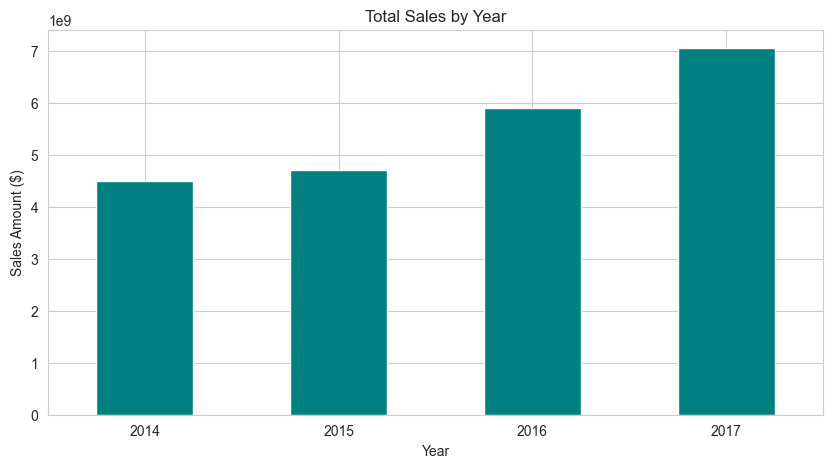

In [187]:
# 5. Simple bar chart: Sales by year (Matplotlib)
plt.figure(figsize=(10, 5))
yearly_sales = df.groupby('Year')['Sales'].sum()
yearly_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales Amount ($)')
plt.xticks(rotation=0)
plt.show()

In [188]:
# plt.figure(figsize=(10, 5))
# sns.barplot(
#     x=df['Year'].unique(), 
#     y=df.groupby('Year')['Sales'].sum().values,
#     color='teal'
# )
# plt.title('Total Sales by Year')
# plt.xlabel('Year')
# plt.ylabel('Sales Amount ($)')
# plt.show()

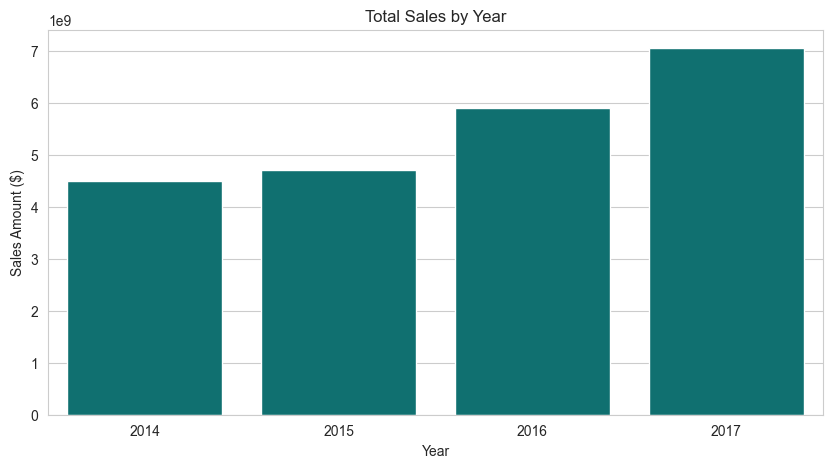

In [189]:
# 5. Simple bar chart: Sales by year (Seaborn)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=sorted(df['Year'].unique()),
    y=df.groupby('Year')['Sales'].sum().values,
    color='teal',
    edgecolor=None,  # Désactive les bordures noires
    width=0.8        # Largeur des barres identique à Matplotlib
)
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales Amount ($)')
plt.xticks(rotation=0)
plt.show()

# 3. Data Visualization with Seaborn:
•	Use Seaborn to generate a bar chart showing top 10 products by sales.
•	Create a scatter plot to analyze the relationship between profit and discount.


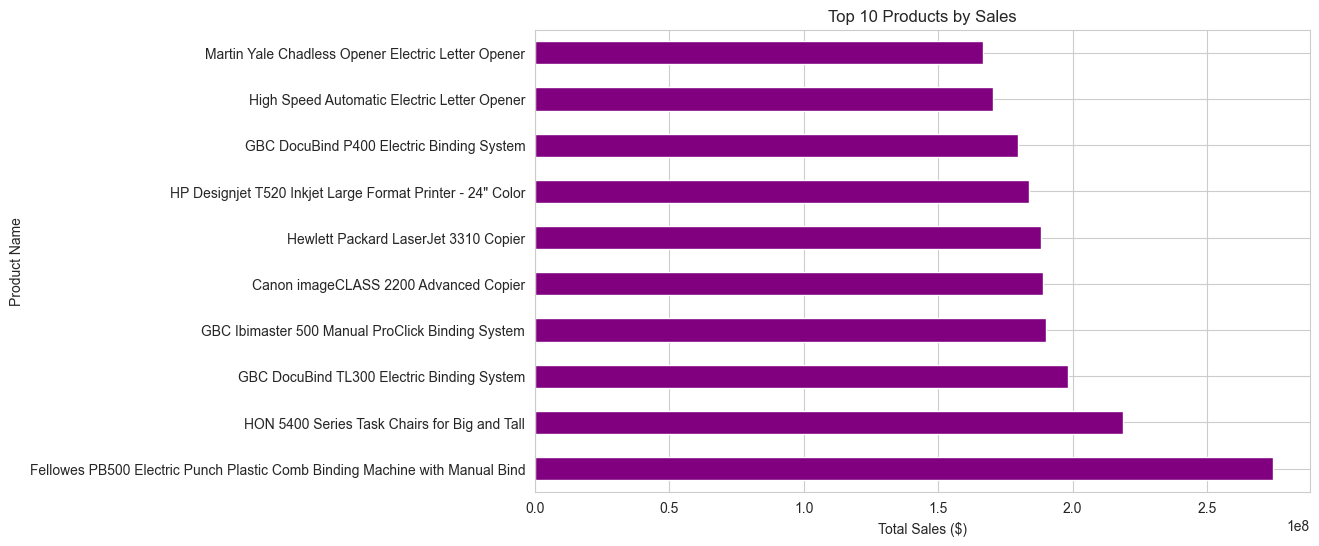

In [190]:
# 6. Top 10 selling products (Matplotlib)
plt.figure(figsize=(10, 6))
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
top_products.plot(kind='barh', color='purple')  # horizontal bar chart
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Name')
plt.show()

C:\Users\Zbook\AppData\Local\Temp\ipykernel_25636\2539444954.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize='small', title_fontsize='10')


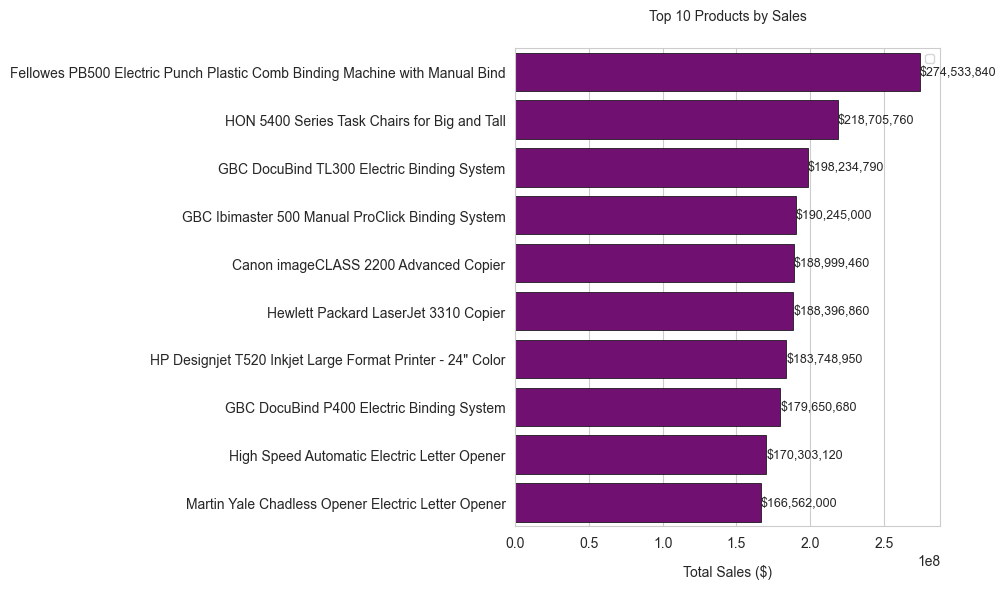

In [191]:
# 6. Top 10 selling products (Seaborn)

# 1. Préparation des données
top_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .nlargest(10)
    .reset_index()
)

# 2. Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_products,
    x='Sales',
    y='Product Name',
    color='purple',
    edgecolor='black',  # Bordure optionnelle
    linewidth=0.5       # Épaisseur de la bordure
)

# 3. Personnalisation
plt.title('Top 10 Products by Sales', pad=20, fontsize=10)
plt.xlabel('Total Sales ($)', labelpad=10)
plt.ylabel('')
plt.tick_params(axis='y', labelsize=10)  # Taille des étiquettes produits
plt.legend(fontsize='small', title_fontsize='10') 

# 4. Ajouter les valeurs sur les barres (optionnel)
for i, value in enumerate(top_products['Sales']):
    plt.text(value, i, f'${value:,.0f}', 
             va='center', ha='left', 
             fontsize=9)

plt.tight_layout()
plt.show()

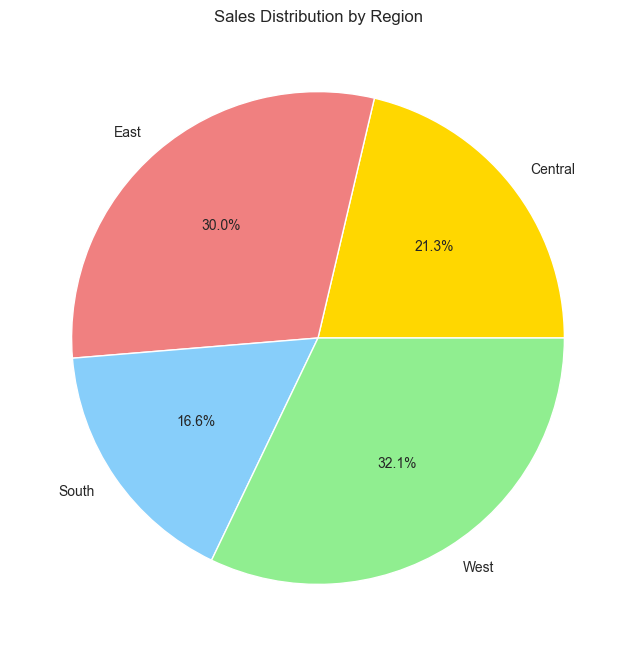

In [192]:
# 7. Sales by region
plt.figure(figsize=(8, 8))
region_sales = df.groupby('Region', observed=True)['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Sales Distribution by Region')
plt.ylabel('')  # Remove the 'Region' label
plt.show()


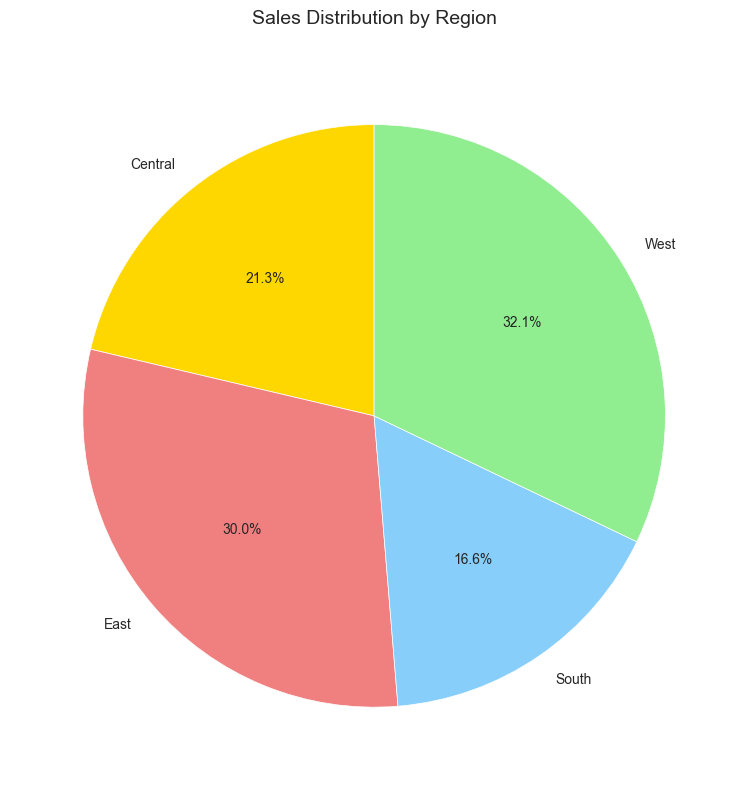

In [193]:
# Préparation des données
region_sales = df.groupby('Region', observed=True)['Sales'].sum().reset_index()

# Configuration du style Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

# Création du pie chart
plt.pie(
    region_sales['Sales'],
    labels=region_sales['Region'],
    autopct='%1.1f%%',
    colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},  # Contours fins blancs
    textprops={'fontsize': 10}  # Taille du texte
)

# Titre centralisé
plt.title('Sales Distribution by Region', pad=20, fontsize=14)

# Affichage
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

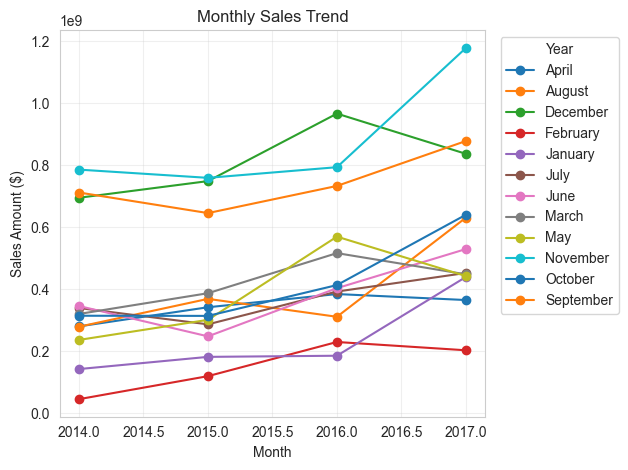

In [194]:
# 8. Monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')
plt.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()


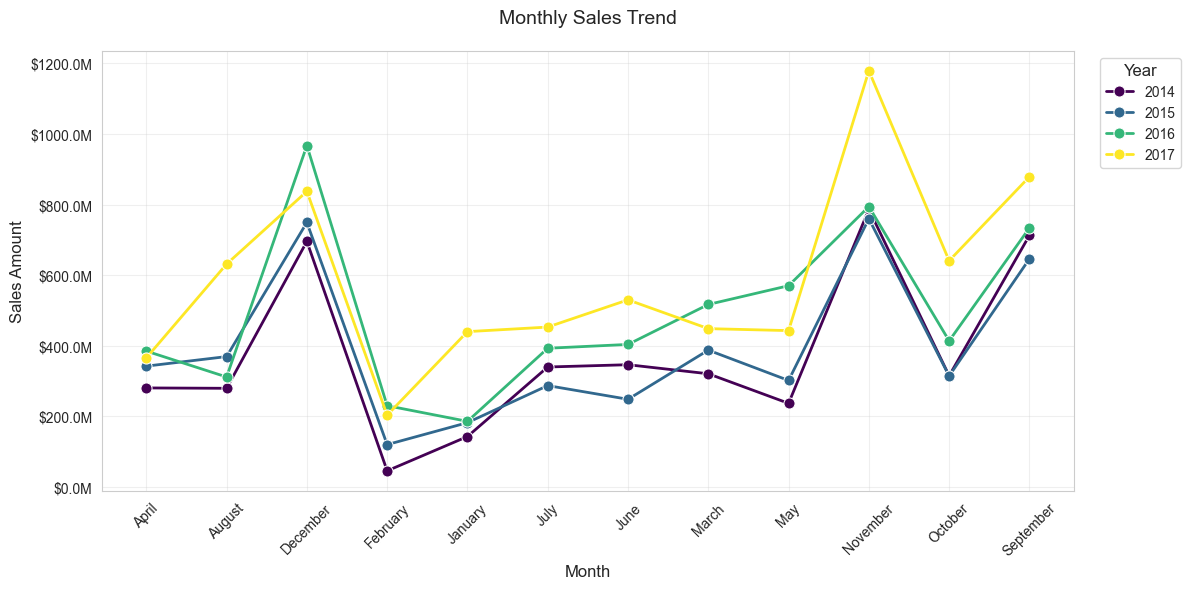

In [207]:
# 1. Préparation des données
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_long['Month'] = pd.Categorical(df_long['Month'], categories=month_order, ordered=True)

monthly_sales = (
    df.groupby(['Year', 'Month'])['Sales']
    .sum()
    .unstack()
    .T.reset_index()  # Transposer pour Seaborn
)

# 2. Formatage des nombres en dollars
def millions(x, pos):
    return f'${x/1e6:.1f}M'

# 3. Création du graphique
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Convertir en format long pour Seaborn
df_long = monthly_sales.melt(id_vars='Month', var_name='Year', value_name='Sales')

sns.lineplot(
    data=df_long,
    x='Month',
    y='Sales',
    hue='Year',
    marker='o',
    markersize=8,
    linewidth=2,
    palette='viridis',  # Palette colorée
)

# 4. Personnalisation
plt.title('Monthly Sales Trend', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))  # Format $X.XM

# Légende améliorée
plt.legend(
    title='Year',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    title_fontsize='12'
)

# Grille et ajustements
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

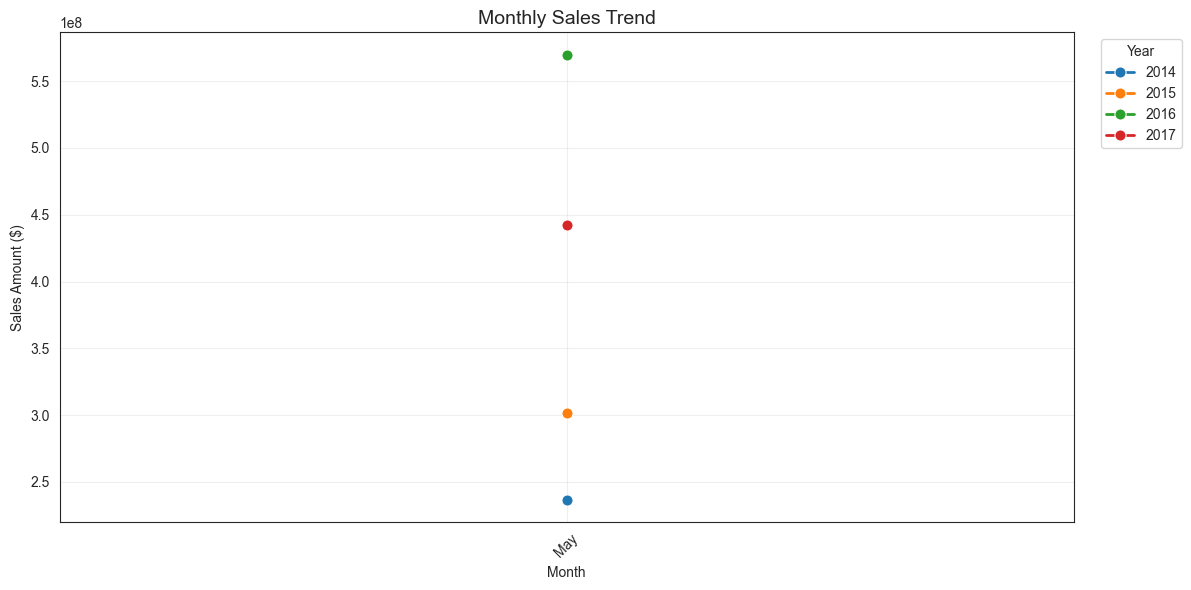

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Préparation des données avec ordre des mois
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = (
    df.groupby(['Year', 'Month'])['Sales']
    .sum()
    .unstack()
    .T
    .reset_index()
)
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

# 2. Graphique avec style Matplotlib
sns.set_style("white")  # Style minimal
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=monthly_sales.melt(id_vars='Month', var_name='Year', value_name='Sales'),
    x='Month',
    y='Sales',
    hue='Year',
    marker='o',
    palette='tab10',  # Palette Matplotlib
    linewidth=2,
    markersize=8
)

# 3. Personnalisation identique
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')
plt.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

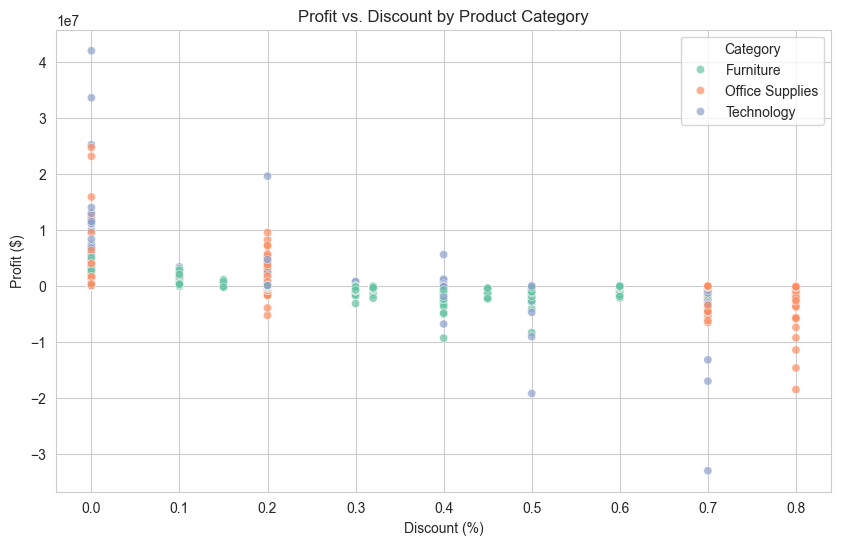

In [196]:
# 9. Profit vs. Discount analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', palette='Set2', alpha=0.7)
plt.title('Profit vs. Discount by Product Category')
plt.xlabel('Discount (%)')
plt.ylabel('Profit ($)')
plt.show()


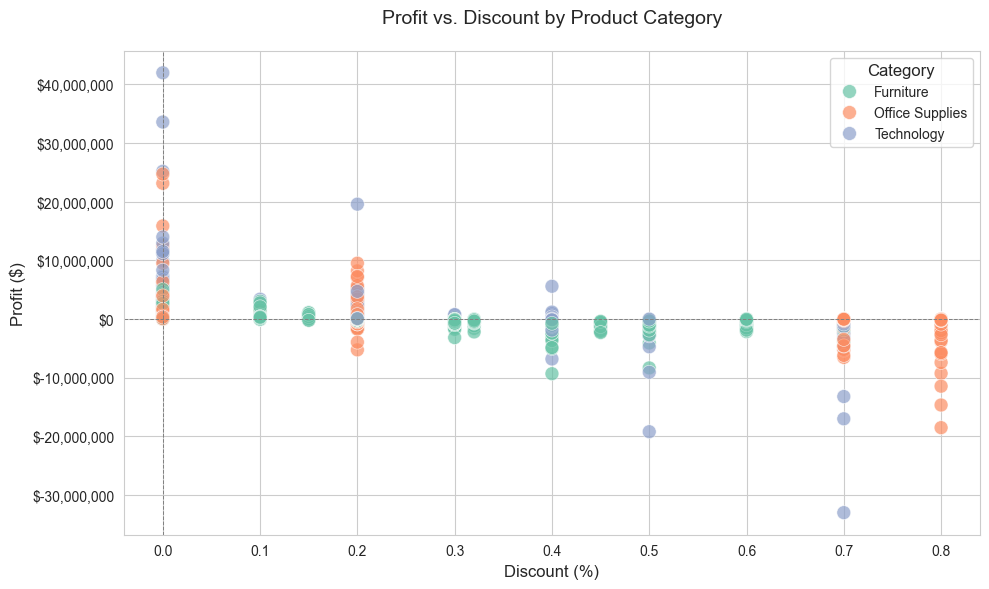

In [199]:
# Configuration du style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Création du scatter plot avec Seaborn
scatter = sns.scatterplot(
    data=df,
    x='Discount',
    y='Profit',
    hue='Category',
    palette='Set2',
    alpha=0.7,
    s=100,  # Taille des points augmentée
    edgecolor='w',  # Bordure blanche pour mieux séparer les points
    linewidth=0.5   # Épaisseur de la bordure
)

# Personnalisation avancée
plt.title('Profit vs. Discount by Product Category', fontsize=14, pad=20)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)

# Amélioration de la légende
plt.legend(
    title='Category',
    title_fontsize='12',
    fontsize='10',
    frameon=True,
    framealpha=0.8,
    loc='upper right'
)

# Ajout de lignes de référence
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Ligne à Profit = 0
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)  # Ligne à Discount = 0

# Ajustement des ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Format monétaire pour l'axe Y
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

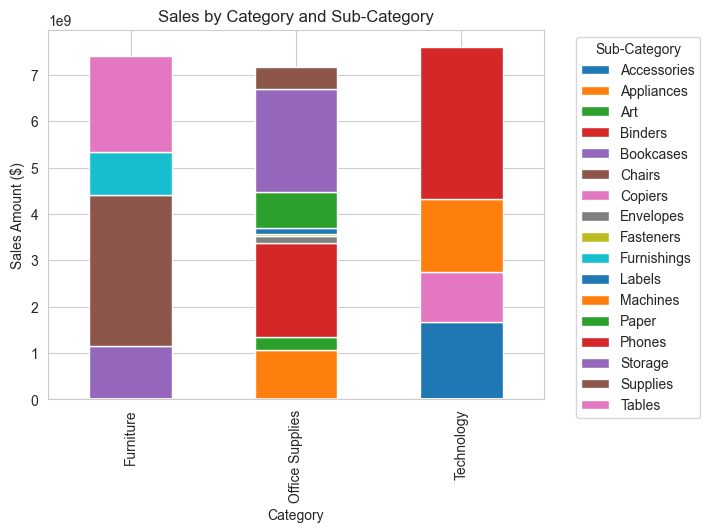

In [197]:
# 10. Sales by category and sub-category
# Calcul des ventes par catégorie/sous-catégorie (sans warning)
category_sales = (
    df.groupby(['Category', 'Sub-Category'], observed=True)['Sales']
    .sum()
    .unstack()
)

# Visualisation
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount ($)')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [198]:
category_sales = df.groupby(['Category', 'Sub-Category'], observed=False)['Sales'].sum().unstack()

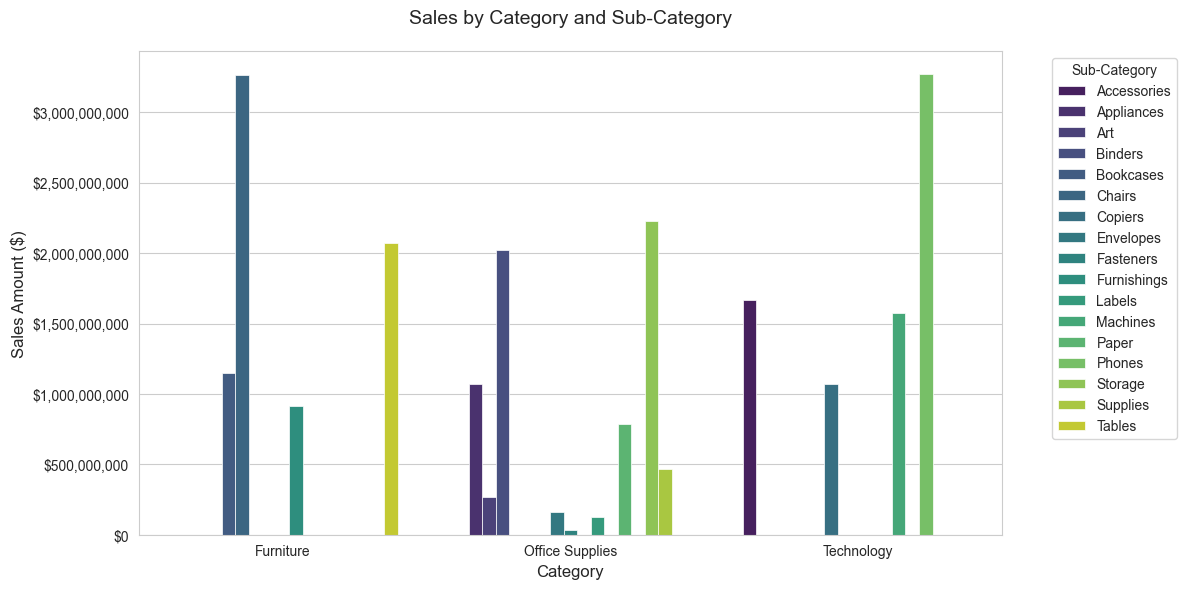

In [200]:
# Préparation des données
category_sales = (
    df.groupby(['Category', 'Sub-Category'], observed=True)['Sales']
    .sum()
    .reset_index()
)

# Configuration du style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Création du graphique à barres empilées
sns.barplot(
    data=category_sales,
    x='Category',
    y='Sales',
    hue='Sub-Category',
    palette='viridis',
    estimator=sum,
    errorbar=None,
    edgecolor='white',
    linewidth=0.5
)

# Personnalisation
plt.title('Sales by Category and Sub-Category', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)

# Format monétaire pour l'axe Y
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Légende améliorée
plt.legend(
    title='Sub-Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    fontsize=10
)

# Rotation des étiquettes X si nécessaire
plt.xticks(rotation=45 if len(category_sales['Category'].unique()) > 3 else 0)

plt.tight_layout()
plt.show()